In [56]:
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [57]:
a=pd.read_csv(r'C:\Users\user1\Music\Python\Models\Activity\Download Data - STOCK_US_XNAS_NFLX.csv')
a.head()

,Date,Open,High,Low,Close,Volume
0,07/07/2025,"1,295.00","1,295.00","1,276.02","1,289.62","2,273,737"
1,07/03/2025,"1,292.00","1,302.26","1,279.76","1,297.18","2,006,224"
2,07/02/2025,"1,296.96","1,299.95","1,271.59","1,284.86","3,048,801"
3,07/01/2025,"1,338.23","1,338.77","1,282.22","1,293.60","4,993,567"
4,06/30/2025,"1,331.00","1,341.15","1,321.21","1,339.13","3,282,908"


In [58]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    250 non-null    object
 1   Open    250 non-null    object
 2   High    250 non-null    object
 3   Low     250 non-null    object
 4   Close   250 non-null    object
 5   Volume  250 non-null    object
dtypes: object(6)
memory usage: 11.8+ KB


In [59]:
#removing comma values from the prices and volume

In [60]:
x=[list(i) for i in a['Open']]
[i.remove(',') for i in x if ',' in i]
a['Open']=[float(''.join(i)) for i in x]

In [61]:
x=[list(i) for i in a['High']]
[i.remove(',') for i in x if ',' in i]
a['High']=[float(''.join(i)) for i in x]

In [62]:
x=[list(i) for i in a['Close']]
[i.remove(',') for i in x if ',' in i]
a['Close']=[float(''.join(i)) for i in x]

In [63]:
x=[list(i) for i in a['Low']]
[i.remove(',') for i in x if ',' in i]
a['Low']=[float(''.join(i)) for i in x]

In [64]:
x=list(a['Volume'])
a['Volume']=[float(''.join(list(filter(lambda k:k!=',',i)))) for i in x]

In [65]:
a

,Date,Open,High,Low,Close,Volume
0,07/07/2025,1295.00,1295.00,1276.02,1289.62,2273737.0
1,07/03/2025,1292.00,1302.26,1279.76,1297.18,2006224.0
2,07/02/2025,1296.96,1299.95,1271.59,1284.86,3048801.0
3,07/01/2025,1338.23,1338.77,1282.22,1293.60,4993567.0
4,06/30/2025,1331.00,1341.15,1321.21,1339.13,3282908.0
...,...,...,...,...,...,...
245,07/12/2024,652.75,655.92,643.71,647.60,3355197.0
246,07/11/2024,672.49,672.49,647.44,652.75,5111928.0
247,07/10/2024,685.02,687.22,673.16,677.65,2651928.0
248,07/09/2024,690.00,695.27,684.72,685.74,2599474.0


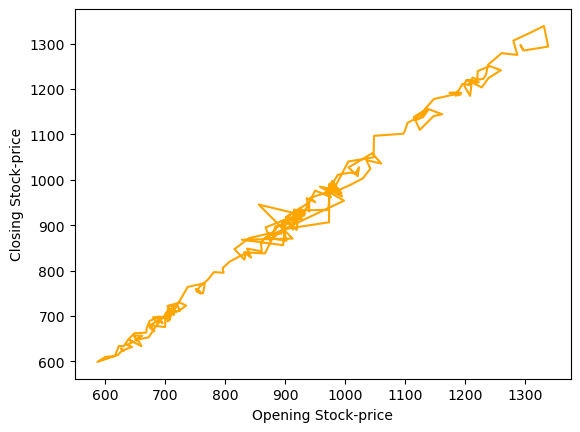

In [66]:
plt.plot(a['Open'],a['Close'],color='orange')
plt.xlabel('Opening Stock-price')
plt.ylabel('Closing Stock-price')
plt.show()

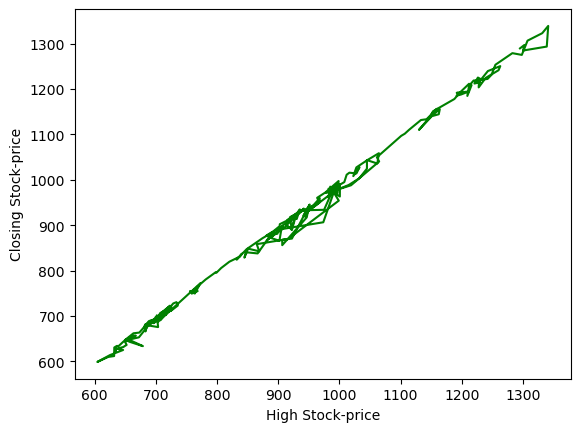

In [67]:
plt.plot(a['High'],a['Close'],color='green')
plt.xlabel('High Stock-price')
plt.ylabel('Closing Stock-price')
plt.show()

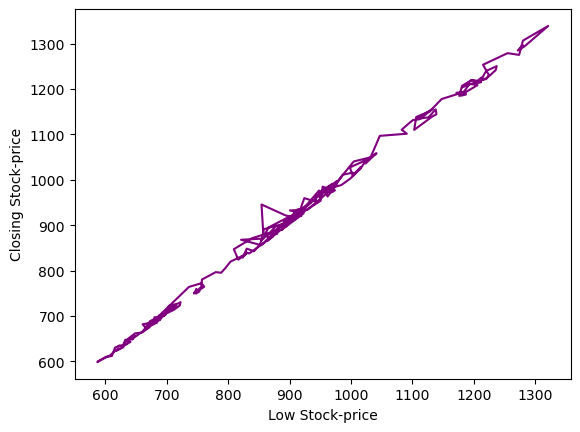

In [68]:
plt.plot(a['Low'],a['Close'],color='purple')
plt.xlabel('Low Stock-price')
plt.ylabel('Closing Stock-price')
plt.show()

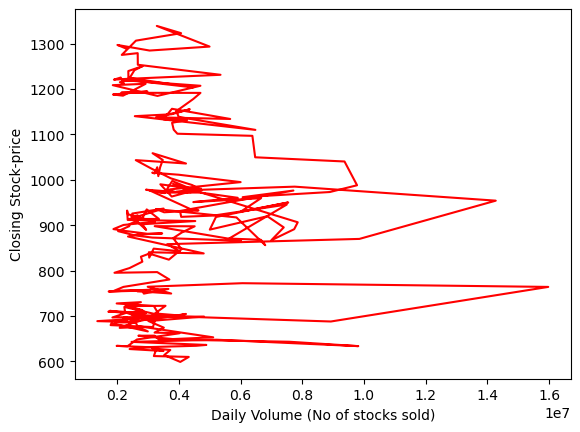

In [69]:
plt.plot(a['Volume'],a['Close'],color='red')
plt.xlabel('Daily Volume (No of stocks sold)')
plt.ylabel('Closing Stock-price')
plt.show()

In [70]:
#predicting the closing stock price (dependent-variable) with the independent variables(Open,High,Low) 
#which shares linear relationship with closing stock-price

In [71]:
x_train,x_test,y_train,y_test=train_test_split(a[['Open','High','Low']],a[['Close']],test_size=0.2,random_state=4)

In [73]:
len(x_train),len(x_test),len(y_train),len(y_test)

(200, 50, 200, 50)

In [74]:
b=linear_model.LinearRegression().fit(x_train,y_train)

In [77]:
o=float(input('Enter Opening Stock price (NETFLIX):'))
h=float(input('Enter High Stock price (NETFLIX):'))
l=float(input('Enter Low Stock price (NETFLIX):'))
#Tuning the model
x_train=pd.concat([x_train,pd.DataFrame([{'Open':o,'High':h,'Low':l}])],ignore_index=True)
p=round(float(b.predict([[o,h,l]])),2)
y_train=pd.concat([y_train,pd.DataFrame([{'Close':p}])],ignore_index=True)
print(f'Closing Stock price would be: {p}')

Enter Opening Stock price (NETFLIX):  1179
Enter High Stock price (NETFLIX): 1179.60
Enter Low Stock price (NETFLIX): 1163.29


Closing Stock price would be: 1169.68


C:\Users\user1\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\user1\AppData\Local\Temp\ipykernel_17484\859163672.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p=round(float(b.predict([[o,h,l]])),2)


In [ ]:
#above is 29th july 2025 netflix stock price prediction 
# Predicted Closing Stock price : 1169.68
# Actual Closing Stock price : 1168.74

In [78]:
x_train

,Open,High,Low
0,1020.79,1022.69,1002.95
1,1103.92,1127.81,1095.48
2,648.70,663.57,648.70
3,833.67,841.00,830.02
4,916.01,918.13,894.50
...,...,...,...
197,719.25,728.59,718.87
198,765.27,769.70,761.12
199,879.38,888.00,869.11
200,1179.00,1179.60,1163.29


In [79]:
y_train

,Close
0,1008.08
1,1125.64
2,661.68
3,837.26
4,907.55
...,...
196,704.32
197,727.43
198,764.24
199,879.19


In [40]:
print('R^2 Score of Model:',r2_score(y_test,b.predict(x_test)))

R^2 Score of Model: 0.9991873113808838
